## Exploring meteorological data in netcdf format (big files, 10+ GB)
Importing standard libraries and some others to try a few things out with this format

In [1]:
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import dask

In [2]:
ds = nc.Dataset('D:/DaymetCH/ch_prcp_1930-2018_m_ch1903.nc4')
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.de/cdi)
    history: Tue Sep 24 10:57:42 2019: cdo -f nc4 -z zip_5 -k auto remapbil,CH_100m_CH1903LV03.grd ch_prcp_1930-2018_m_laea.nc4 ch_prcp_1930-2018_m_ch1903.nc4
Thu Sep 19 14:35:41 2019: cdo -L -f nc4 -z zip_5 -k auto monsum /bolt/daymet/data/obs_ts_d_1930_heute/ch_prcp_1930-2018_d_grid_laea.nc4 ./ch_prcp_1930-2018_m_laea.nc4
Tue May 28 17:21:30 2019: cdo -f nc4 -z zip_6 -k grid mergetime /bolt/daymet/data/obs_ts_d_1930_2017/ch_prcp_1930-2017_d_grid_laea.nc4 /bolt/daymet/data/obs_ts_d_1930_2017/ch_prcp_2018_d_grid_laea.nc4 ch_prcp_1930-2018_d_grid_laea.nc4
Mon Jun 18 14:18:22 2018: ncatted -O --bfr_sz=33554432 -a earth_radius,laea,d,, -a semi_major_axis,laea,o,f,6370997.0 ch_prcp_1930-2017_d_grid_laea.nc4
Tue Jun 12 10:52:17 2018: cdo -f nc4 -z zip_6 -k grid copy ch_prcp_1930-2017_d.nc4 ch_prcp_1930-2017_d_grid_laea.nc4
Wed Apr 2

Description of the prcp (precipitations) variable says it is ordered "y,x" but it is in order "x,y" as the rest of metadata says.

In [3]:
ds.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     standard_name: time
     bounds: time_bnds
     units: days since 1930-1-1 00:00:00
     calendar: standard
     axis: T
 unlimited dimensions: time
 current shape = (1068,)
 filling off,
 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 time_bnds(time, bnds)
 unlimited dimensions: time
 current shape = (1068, 2)
 filling off,
 'x': <class 'netCDF4._netCDF4.Variable'>
 float64 x(x)
     standard_name: projection_x_coordinate
     long_name: x coordinate of projection
     units: m
     axis: X
 unlimited dimensions: 
 current shape = (3677,)
 filling off,
 'y': <class 'netCDF4._netCDF4.Variable'>
 float64 y(y)
     standard_name: projection_y_coordinate
     long_name: y coordinate of projection
     units: m
     axis: Y
 unlimited dimensions: 
 current shape = (2261,)
 filling off,
 'hotine_oblique_mercator': <class 'netCDF4._netCDF4.Variable'>
 int32 hotine_oblique_mercator()
     grid_mapping_name: hotin

In [4]:
ds.__dict__

{'CDI': 'Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.de/cdi)',
 'history': 'Tue Sep 24 10:57:42 2019: cdo -f nc4 -z zip_5 -k auto remapbil,CH_100m_CH1903LV03.grd ch_prcp_1930-2018_m_laea.nc4 ch_prcp_1930-2018_m_ch1903.nc4\nThu Sep 19 14:35:41 2019: cdo -L -f nc4 -z zip_5 -k auto monsum /bolt/daymet/data/obs_ts_d_1930_heute/ch_prcp_1930-2018_d_grid_laea.nc4 ./ch_prcp_1930-2018_m_laea.nc4\nTue May 28 17:21:30 2019: cdo -f nc4 -z zip_6 -k grid mergetime /bolt/daymet/data/obs_ts_d_1930_2017/ch_prcp_1930-2017_d_grid_laea.nc4 /bolt/daymet/data/obs_ts_d_1930_2017/ch_prcp_2018_d_grid_laea.nc4 ch_prcp_1930-2018_d_grid_laea.nc4\nMon Jun 18 14:18:22 2018: ncatted -O --bfr_sz=33554432 -a earth_radius,laea,d,, -a semi_major_axis,laea,o,f,6370997.0 ch_prcp_1930-2017_d_grid_laea.nc4\nTue Jun 12 10:52:17 2018: cdo -f nc4 -z zip_6 -k grid copy ch_prcp_1930-2017_d.nc4 ch_prcp_1930-2017_d_grid_laea.nc4\nWed Apr 25 15:06:22 2018: ncrcat -4 -L 4 --cnk_csh=8000000000 --cnk_plc=g3d --cnk_dmn=ti

In [13]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1068
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 3677
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 2261


In [14]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    bounds: time_bnds
    units: days since 1930-1-1 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (1068,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1068, 2)
filling off
<class 'netCDF4._netCDF4.Variable'>
float64 x(x)
    standard_name: projection_x_coordinate
    long_name: x coordinate of projection
    units: m
    axis: X
unlimited dimensions: 
current shape = (3677,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float64 y(y)
    standard_name: projection_y_coordinate
    long_name: y coordinate of projection
    units: m
    axis: Y
unlimited dimensions: 
current shape = (2261,)
filling off
<class 'netCDF4._netCDF4.Variable'>
int32 hotine_oblique_mercator()
    grid_mapping_name: hotine_oblique_mercator
    azimuth: 90.0
    false_easting: 600000.0
    false_northing: 200000.0
    

In [96]:
print(ds['prcp'])

<class 'netCDF4._netCDF4.Variable'>
float32 prcp(time, y, x)
    standard_name: precipitation
    long_name: Precipitation
    units: cm
    grid_mapping: hotine_oblique_mercator
    _FillValue: -9999.0
    missing_value: -9999.0
unlimited dimensions: time
current shape = (1068, 2261, 3677)
filling off


In [57]:
ds['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    bounds: time_bnds
    units: days since 1930-1-1 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (1068,)
filling off

At this stage we still have loaded almost nothing into memory, but this will change if we want to actually look at the data

In [4]:
y = ds.variables['y'][:]
x = ds.variables['x'][:]
d_time = ds.variables['time'][:]

In [5]:
prcp = ds.variables['prcp'][1020:] # slicing data, from 2015 to 2018

# selecting everything would result in a very big file, most likely more than a local computer can handle (32 GB)

In [5]:
time_unit = ds.variables["time"].getncattr('units')
time_cal = ds.variables["time"].getncattr('calendar')
print(time_unit)
local_time = nc.num2date(d_time, units=time_unit, calendar=time_cal) 
print("Original time %s is now converted as %s" % (d_time[0], local_time[0])) 

days since 1930-1-1 00:00:00
Original time 30.0 is now converted as 1930-01-31 00:00:00


In [6]:
print("Selected time %s converted as %s" % (d_time[1020], local_time[1020])) 

Selected time 31076.0 converted as 2015-01-31 00:00:00


In [7]:
prcp.shape

(48, 2261, 3677)

In [8]:
ds.variables['prcp'][1020].compressed().max()
# Location with max precipitation in Switzerland in January 2015 saw 46.74 cm of rain/snow

46.74468

### Plotting results

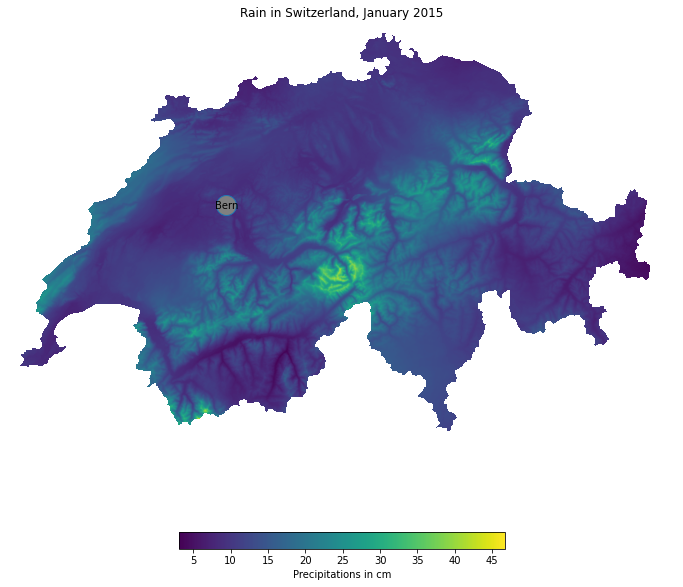

In [10]:
plt.figure(figsize=(12,12))
plt.imshow(prcp[0],origin='lower')
plt.axis('off')
plt.colorbar(orientation='horizontal',fraction=0.025,label='Precipitations in cm')
plt.plot(1200, 1260, marker="o", markersize=20, markerfacecolor="gray")
plt.annotate('Bern',(1140,1240))
plt.title('Rain in Switzerland, January 2015')
plt.show()

---

Trying out the Xarray library

In [83]:
import xarray as xr

ds = xr.open_dataset('D:/DaymetCH/ch_prcp_1930-2018_m_ch1903.nc4', chunks={"time": 12})
ds

<xarray.Dataset>
Dimensions:                  (time: 1068, bnds: 2, x: 3677, y: 2261)
Coordinates:
  * time                     (time) datetime64[ns] 1930-01-31 ... 2018-12-31
  * x                        (x) float64 4.8e+05 4.801e+05 ... 8.476e+05
  * y                        (y) float64 7.4e+04 7.41e+04 ... 2.999e+05 3e+05
Dimensions without coordinates: bnds
Data variables:
    time_bnds                (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    hotine_oblique_mercator  int32 ...
    prcp                     (time, y, x) float32 dask.array<chunksize=(12, 2261, 3677), meta=np.ndarray>
Attributes:
    CDI:                       Climate Data Interface version 1.9.7.1 (http:/...
    history:                   Tue Sep 24 10:57:42 2019: cdo -f nc4 -z zip_5 ...
    source:                    byt2nc.py (version 0.2) by D. Schmatz
    Conventions:               CF-1.5
    description:               Converted file ch_prcp_2014_d.byt
    nco_openmp_thread_number:  1
    NCO:                       4.6.6
    frequency:                 mon
    CDO:                       Climate Data Operators version 1.9.7.1 (http:/...

In [86]:
ds['prcp'][1056]

<xarray.DataArray 'prcp' (y: 2261, x: 3677)>
dask.array<getitem, shape=(2261, 3677), dtype=float32, chunksize=(2261, 3677), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2018-01-31
  * x        (x) float64 4.8e+05 4.801e+05 4.802e+05 ... 8.475e+05 8.476e+05
  * y        (y) float64 7.4e+04 7.41e+04 7.42e+04 ... 2.998e+05 2.999e+05 3e+05
Attributes:
    standard_name:  precipitation
    long_name:      Precipitation
    units:          cm
    grid_mapping:   hotine_oblique_mercator

Easier to glimpse in a notebook, not necessarily better to manipulate though the chunks offer interesting possibilities

In [91]:
test = ds['prcp'][1056:1068].to_dataframe() #2018

In [98]:
test

prcp
time       y        x             
2018-01-31 74000.0  480000.0   NaN
                    480100.0   NaN
                    480200.0   NaN
                    480300.0   NaN
                    480400.0   NaN
...                            ...
2018-12-31 300000.0 847200.0   NaN
                    847300.0   NaN
                    847400.0   NaN
                    847500.0   NaN
                    847600.0   NaN

[99764364 rows x 1 columns]